# Decision Tree Implementation

Problem Statement - We have a sample bank data . Using this and applying DT Tree , we find whether the 
customer will make a deposit or not.

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from IPython.display import Image  
from sklearn.tree import export_graphviz

# Reading Data

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Converting the Deposit variable to 0/1 and storing in Target variable

In [5]:
df['target']=np.where(df['deposit']=="yes",1,0)

In [6]:
df.drop(['deposit'],axis=1,inplace=True)

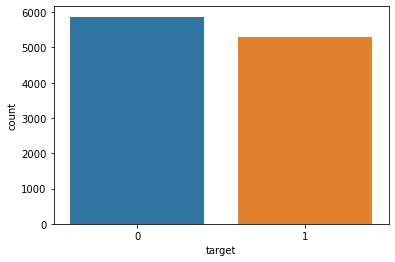

In [7]:
sns.countplot(x=df['target'])
plt.show()

# Seperating dependent and independent variable

In [8]:
# Independent variables i.e x1, x2 x3
X=df.drop(['target'],axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [9]:
#Dependant variable i.e y
Y = df[['target']]
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [12]:
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [13]:
num = X.select_dtypes(include="number")
char = X.select_dtypes(include="object")

# Dealing with numeric columns

In [14]:
num.shape

(11162, 7)

In [15]:
num.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [16]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
1%,22.000000,-522.000000,1.000000,14.000000,1.000000,-1.000000,0.000000
5%,26.000000,-54.950000,3.000000,51.000000,1.000000,-1.000000,0.000000
10%,28.000000,0.000000,4.000000,77.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000


# Outlier Analysis 

In [17]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [18]:
num=num.apply(lambda x : outlier_cap(x))

In [19]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.198172,1430.772779,15.658036,368.063433,2.433883,50.111958,0.776384
std,11.734976,2324.020682,8.420740,327.559756,2.176754,103.016608,1.797315
min,22.000000,-522.000000,1.000000,14.000000,1.000000,-1.000000,0.000000
1%,22.000000,-522.000000,1.000000,14.000000,1.000000,-1.000000,0.000000
5%,26.000000,-54.950000,3.000000,51.000000,1.000000,-1.000000,0.000000
10%,28.000000,0.000000,4.000000,77.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000


# Missing value / Null value Analysis 

In [20]:
num.isnull().mean()

age         0.0
balance     0.0
day         0.0
duration    0.0
campaign    0.0
pdays       0.0
previous    0.0
dtype: float64

# Removing 0 variance features

In [28]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# get_support gives us the columns that are retained after removing the 0 variance columns
cols = varselector.get_support(indices=True)
#storing it in another dataframe
num_1 = num.iloc[:,cols]

In [29]:
num_1.shape   #new data frame

(11162, 7)

In [40]:
num_1['age_1']=num_1['age']    # There are no correlated variables so just added a same column to show this 
num_1.head()

,age,balance,day,duration,campaign,pdays,previous,age_1
0,59,2343.0,5,1042.0,1,-1.0,0,59
1,56,45.0,5,1467.0,1,-1.0,0,56
2,41,1270.0,5,1389.0,1,-1.0,0,41
3,55,2476.0,5,579.0,1,-1.0,0,55
4,54,184.0,5,673.0,2,-1.0,0,54


# Removing Corelated variables

In [34]:
!pip install feature-engine

In [45]:
from feature_engine.selection import SmartCorrelatedSelection
# set up the selector
tr = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.8,
    selection_method="variance",
)

num_1 = tr.fit_transform(num_1)

In [42]:
tr.correlated_feature_sets_

[{'age', 'age_1'}]

In [43]:
num_1.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343.0,5,1042.0,1,-1.0,0
1,56,45.0,5,1467.0,1,-1.0,0
2,41,1270.0,5,1389.0,1,-1.0,0
3,55,2476.0,5,579.0,1,-1.0,0
4,54,184.0,5,673.0,2,-1.0,0


# Dealing with Categorical Data 

In [328]:
char.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown


In [329]:
 char.shape

(11162, 9)

# Encoded the features to numerical data 

In [48]:
def preprocessor(char):
    le = preprocessing.LabelEncoder()
    char = le.fit_transform(char)
    return char

In [49]:
char_1 = char.apply(lambda x : preprocessor(x))

In [50]:
char_1.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,0,1,1,0,1,0,2,8,3
1,0,1,1,0,0,0,2,8,3
2,9,1,1,0,1,0,2,8,3
3,7,1,1,0,1,0,2,8,3
4,0,1,2,0,0,0,2,8,3


# No null or missing values 

In [51]:
char_1.isnull().mean()

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
poutcome     0.0
dtype: float64

In [52]:
char_1.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])
# The min value and 1 % and max values and 99% are close so , no need to do outlier clipper

,job,marital,education,default,housing,loan,contact,month,poutcome
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,4.487905,1.199337,1.285164,0.015051,0.473123,0.130801,0.489697,5.445709,2.477782
std,3.225132,0.625552,0.749478,0.121761,0.499299,0.337198,0.818724,3.191939,1.002952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
50%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000
75%,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,3.000000


In [53]:
char_1.shape

(11162, 9)

# Remove features with 0 Variance

In [54]:
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(char_1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
char_2 = char_1.iloc[:,cols]

In [55]:
char_2.iloc[0]

job          0
marital      1
education    1
default      0
housing      1
loan         0
contact      2
month        8
poutcome     3
Name: 0, dtype: int32

In [56]:
char_2.shape

(11162, 9)

# Removing Correlated variables

In [57]:
from feature_engine.selection import SmartCorrelatedSelection
# set up the selector
tr = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.75,
    selection_method="variance",
)

num_1 = tr.fit_transform(num_1)

In [58]:
tr.correlated_feature_sets_

[]

In [59]:
char_2.drop(['default'],axis=1,inplace=True)

In [60]:
#Just from my observation default had 0.1 std deviation so i dropped it .
char_2.shape

(11162, 8)

# Final data 

In [61]:
X_all=pd.concat([num_1,char_2],axis=1,join="inner")

In [342]:
X_all.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,loan,contact,month,poutcome
0,59,2343.0,5,1042.0,1,-1.0,0,0,1,1,1,0,2,8,3
1,56,45.0,5,1467.0,1,-1.0,0,0,1,1,0,0,2,8,3
2,41,1270.0,5,1389.0,1,-1.0,0,9,1,1,1,0,2,8,3
3,55,2476.0,5,579.0,1,-1.0,0,7,1,1,1,0,2,8,3
4,54,184.0,5,673.0,2,-1.0,0,0,1,2,0,0,2,8,3


# Modelling

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X_all,Y,test_size=0.3)

In [66]:
model = DecisionTreeClassifier()

In [ ]:
#Grid search CV

In [67]:
params = {'max_depth': [6,7,8,9],
          'criterion': ['gini', 'entropy'],
          'min_samples_split': [10,20,30,40],
          'min_samples_leaf': [10,15,20,25]}

cv_rf = GridSearchCV(model, cv = 10,
                     param_grid=params, 
                     n_jobs = 3)

cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 30}


In [69]:
model.set_params(max_depth= 9,
          criterion='entropy',
          min_samples_split=30,
          min_samples_leaf=20)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=20,
                       min_samples_split=30)

In [70]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=20,
                       min_samples_split=30)

# Accuracy

In [71]:
model_score_train = model.score(X_train, Y_train)
print(model_score_train)

0.841546141046973


In [72]:
model_score_test = model.score(X_test, Y_test)
print(model_score_test)

0.8166616900567334


# Prediction

In [73]:
target_predicted = model.predict(X_test)

In [74]:
print(Y['target'].mean())
print(target_predicted.mean())

0.4738398136534671
0.4747685876381009


# Adding the predicted target to new data frame df and converting it to excel file

In [75]:
data = pd.concat([X_test,Y_test],axis=1,join="inner")

In [76]:
data.shape

(3349, 16)

In [77]:
data['target_predicted'] = target_predicted

In [78]:
data.shape

(3349, 17)

In [79]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,loan,contact,month,poutcome,target,target_predicted
1546,35,43.0,20,860.0,1,-1.0,0,4,1,2,1,0,0,0,3,1,1
10673,38,1583.0,15,386.0,1,-1.0,0,1,2,0,1,0,0,8,3,0,0
5442,51,3413.0,27,146.0,7,-1.0,0,7,1,3,0,0,0,1,3,0,0
1477,65,587.0,15,223.0,2,-1.0,0,4,1,1,0,0,0,0,3,1,1
1952,32,0.0,13,440.0,2,-1.0,0,9,2,2,1,1,0,8,3,1,0


In [80]:
data.to_excel("output.xlsx")

# Probablity of the prediction to be 0/1

In [362]:
target_probablity= model.predict_proba(X_test)[:, 1]
target_probablity

array([0.74468085, 0.00223214, 0.0106383 , ..., 0.19152047, 0.39429929,
       0.02666667])

# Performace Metrics

In [363]:
fpr, tpr,_= roc_curve(Y_test, target_probablity)
roc_auc= auc(fpr, tpr)

# area under the curve

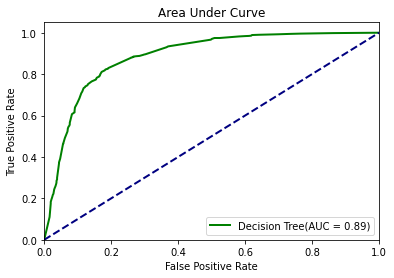

In [364]:
plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Recall

In [86]:
from sklearn import metrics
print(metrics.recall_score(Y_test, target_predicted))

0.8088607594936709


# f1 score

In [87]:
print(metrics.f1_score(Y_test, target_predicted))

0.8063091482649843


# Confusion matrix

In [279]:
# Y_test -> actual prediction
# target_predicted -> Prediction done by model

In [365]:
cf_matrix = confusion_matrix(Y_test, target_predicted)
print(cf_matrix)

[[1443  299]
 [ 304 1303]]


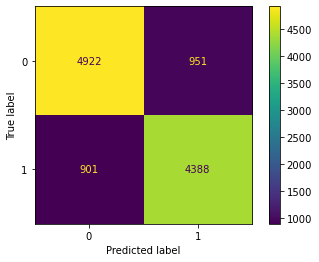

In [88]:
metrics.plot_confusion_matrix(model,X_all,Y)